# Decision Trees

In [ ]:
options("scipen"=100, "digits"=4)

if(!require("rpart")) install.packages("rpart")
if(!require("rpart.plot")) install.packages("rpart.plot")
if(!require("Metrics")) install.packages("Metrics")

library("knitr")
library("rpart")
library("rpart.plot")
library("Metrics")

## Building a Decision Tree

In [ ]:
url<-"https://docs.google.com/spreadsheets/d/e/2PACX-1vTFmRX4RW3PitgcJya0X2sRbSiD0J2t0oYewyhkkyWwR9i8NIaHiuQKrBtLlrwG9fzn4MvNOM92olnK/pub?gid=0&single=true&output=csv"
df<-read.csv(url)

Lets see the info on this dataframe

In [ ]:
str(df)

'data.frame':   7 obs. of  3 variables:
 $ gender : chr  "F" "M" "F" "F" ...
 $ age    : chr  "Adult" "Adult" "Adult" "Young" ...
 $ product: chr  "MindCraft" "MindCraft" "MindCraft" "MindCraft" ...

Here is the original data

In [ ]:
print(df)

  gender   age        product
1      F Adult      MindCraft
2      M Adult      MindCraft
3      F Adult      MindCraft
4      F Young      MindCraft
5      M Young AlienBetweenUs
6      M Young AlienBetweenUs
7      F Young      MindCraft

Lets sort it by gender:

In [ ]:
print(df[order(df$gender),])

  gender   age        product
1      F Adult      MindCraft
3      F Adult      MindCraft
4      F Young      MindCraft
7      F Young      MindCraft
2      M Adult      MindCraft
5      M Young AlienBetweenUs
6      M Young AlienBetweenUs

So if we split on gender here is what we would get:

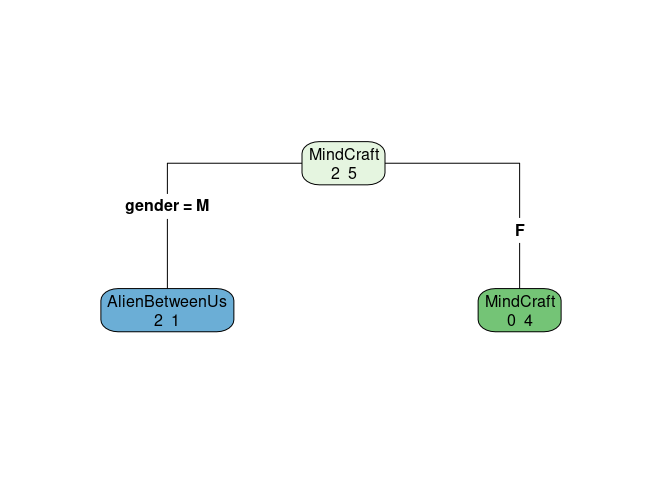

In [ ]:
control <- rpart.control(minsplit=1, maxdepth=1)
model <- rpart(product~gender, data=df, method="class", control = control)
rpart.plot(model, type=4, extra = 1, digits=-2)

The tree above makes 1 mistake out of 7.

Lets sort it by age:

In [ ]:
print(df[order(df$age),])

  gender   age        product
1      F Adult      MindCraft
2      M Adult      MindCraft
3      F Adult      MindCraft
4      F Young      MindCraft
5      M Young AlienBetweenUs
6      M Young AlienBetweenUs
7      F Young      MindCraft

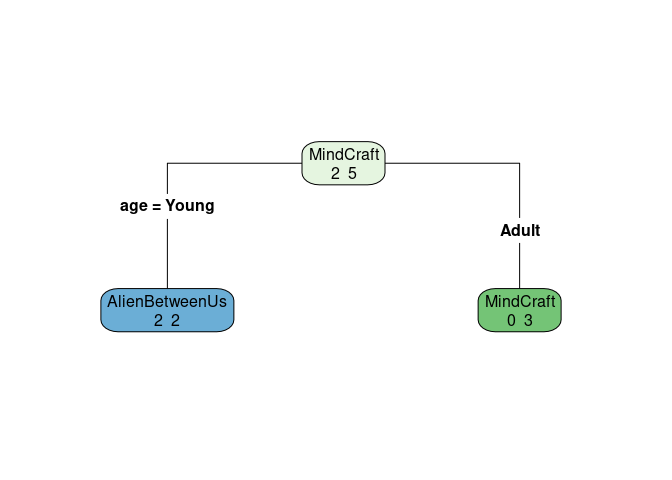

In [ ]:
control <- rpart.control(minsplit=1,maxdepth=1,cp=-1)
model <- rpart(product~age, data=df, method="class", control = control)
rpart.plot(model, type=4, extra = 1, digits=-2)

The tree above makes 2 mistake out of 7.

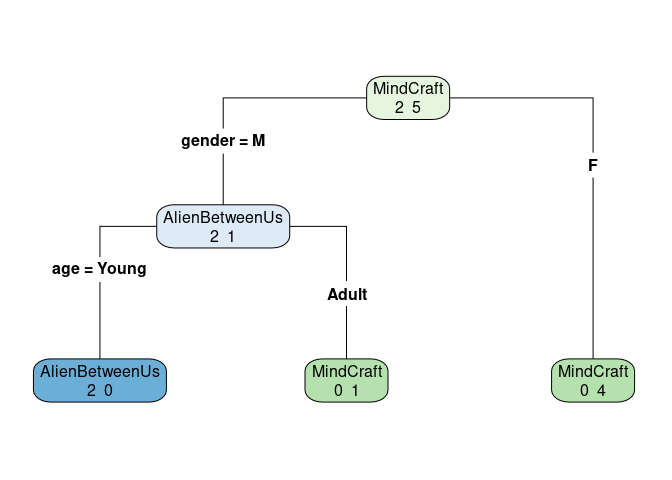

In [ ]:
control <- rpart.control(minsplit=1, maxdepth=3,cp=-1)
model <- rpart(product~age+gender, data=df, method="class", control=control)
rpart.plot(model, type=4, extra = 1, digits=-2)

In [ ]:
pred <- predict(model, newdata = testdf, type = 'class')
str(pred)